## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 

### Imports


In [145]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plot
from tabulate import tabulate

### COVID-19 data from Belarus

In [149]:
dates = ["1/22/20","1/23/20","1/24/20","1/25/20","1/26/20","1/27/20","1/28/20","1/29/20","1/30/20","1/31/20","2/1/20","2/2/20","2/3/20","2/4/20","2/5/20","2/6/20","2/7/20","2/8/20","2/9/20","2/10/20","2/11/20","2/12/20","2/13/20","2/14/20","2/15/20","2/16/20","2/17/20","2/18/20","2/19/20","2/20/20","2/21/20","2/22/20","2/23/20","2/24/20","2/25/20","2/26/20","2/27/20","2/28/20","2/29/20","3/1/20","3/2/20","3/3/20","3/4/20","3/5/20","3/6/20","3/7/20","3/8/20","3/9/20","3/10/20","3/11/20","3/12/20","3/13/20","3/14/20","3/15/20","3/16/20","3/17/20","3/18/20","3/19/20","3/20/20","3/21/20","3/22/20","3/23/20","3/24/20","3/25/20","3/26/20","3/27/20","3/28/20","3/29/20","3/30/20","3/31/20","4/1/20","4/2/20","4/3/20","4/4/20","4/5/20","4/6/20","4/7/20"]
cases = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,6,6,6,6,6,6,9,9,12,27,27,27,36,36,51,51,69,76,76,81,81,86,86,94,94,94,152,152,163,304,351,440,562,700,861]

### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 


In [150]:
def aproximate(x, y, m):
    length = len(x)
    vals = [0] * (2 * m + 1)
    for i in range(2 * m + 1):
        sum = 0
        for j in range(length):
            sum += pow(x[j], i)
        vals[i] = sum
    b = np.zeros(m + 1)
    for i in range(m + 1):
        sum = 0
        for j in range(length):
            sum += (pow(x[j], i) * y[j])
        b[i] = sum
    g_m = np.zeros((m + 1, m + 1))
    for i in range(m + 1):
        for j in range(m + 1):
            g_m[i][j] = vals[i + j]
    a = np.linalg.solve(g_m, b)
    pn = 0
    X = sp.symbols('x')
    for i in range(m + 1):
        pn += pow(X, i) * a[i]

    return sp.simplify(pn)

def into_table(fun, min_val, max_val, num):
    x = []
    y = []
    section = (max_val - min_val) / float(num)
    
    for i in np.arange(min_val, max_val + 0.1, section):
        x.append(i)
        y.append(fun(i))
    return x, y

def get_value(poly, x):
  X = sp.symbols('x')
  return poly.evalf(subs={X: x})
        
def compare(fun1, fun2, fname, min, max, n, err):
    tab = []
    section = (max - min) / float(n)

    min_val = section / 2 + min
    max_val = section / 2 + max
    for x in np.arange(min_val, max_val, section):
        tab.append([x, fun1(x), fun2(x), abs((fun2(x) - fun1(x)) / fun2(x))]) 
        err.append(abs((fun2(x) - fun1(x)) / fun2(x)))
    
def show_graphic(fun1, fun2, fname, min, max, n):
    x = []
    y1 = []
    y2 = []
    section = (max - min) / float(n)
    
    for i in np.arange(min, max+0.1, section):
        x.append(i)
        y1.append(fun1(i))
        y2.append(fun2(i))

    plot.title(fname)
    plot.xlabel("X")
    plot.ylabel("Y")
    plot.plot(x, y1, label = "Approximation" + fname)
    plot.plot(x, y2, label = fname)
    plot.legend()
    plot.show()


def approximation(min, max, n, m):
    fun = lambda x: pow(x, 3) + 2 * x
    sqrt_x, sqrt_y = into_table(np.math.sqrt, min, max, n)
    sin_x, sin_y = into_table(np.math.sin, min, max, n)
    f_x, f_y = into_table(fun, min, max, n)
    

    for i in range(1, m + 1):
        t_sqrt = aproximate(sqrt_x, sqrt_y, i)
        t_f = aproximate(f_x, f_y, i)
        t_sin = aproximate(sin_x, sin_y, i)

        poly_sqrt = lambda x: get_value(t_sqrt, x)
        poly_f = lambda x: get_value(t_f, x)
        poly_sin = lambda x: get_value(t_sin, x)

        err = []
        compare(poly_sqrt, math.sqrt, "sqrt", min, max, n, err)
        print(i, "Relative error:  ",(np.sum(err) / len(err)))
        show_graphic(poly_sqrt, math.sqrt, "sqrt", min, max, 100)

        err = []
        compare(poly_sin, math.sin, "sin", min, max, n, err)
        print(i, "Relative error:  ",(np.sum(err) / len(err)))
        show_graphic(poly_sin, math.sin, "sin", min, max, 100)

        err = []
        compare(poly_f, fun, "x^3 + 2x", min, max, n, err)
        print(i, "Relative error:  ",(np.sum(err) / len(err)))
        show_graphic(poly_f, fun, "x^3 + 2x", min, max, 100)

(1, 'Relative error:  ', 0.108245924052918)


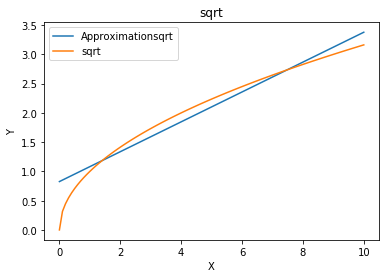

(1, 'Relative error:  ', 1.32686498767828)


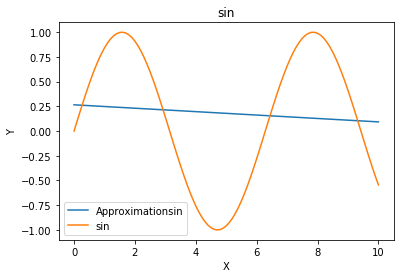

(1, 'Relative error:  ', 38.3464905222696)


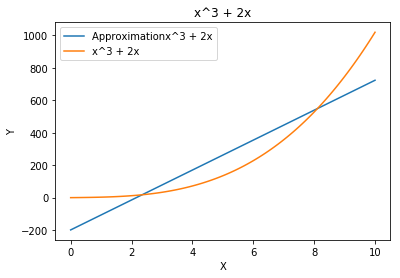

(2, 'Relative error:  ', 0.0464145355661575)


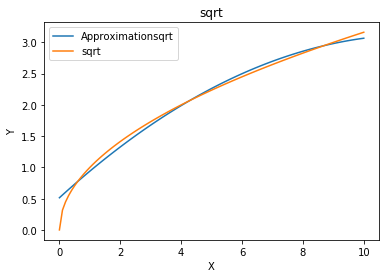

(2, 'Relative error:  ', 1.40585730647372)


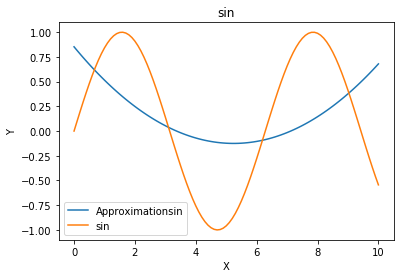

(2, 'Relative error:  ', 7.86287677935439)


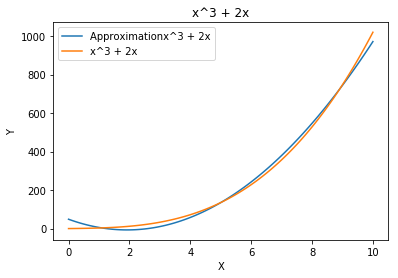

(3, 'Relative error:  ', 0.0256639856058848)


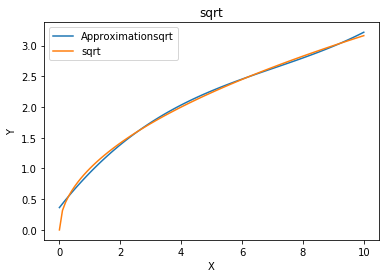

(3, 'Relative error:  ', 1.50876245837642)


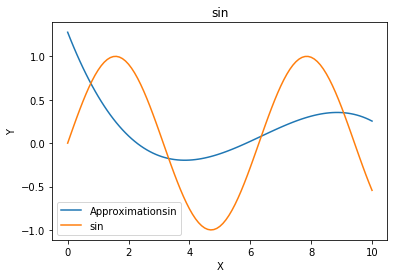

(3, 'Relative error:  ', 1.47075151141016e-12)


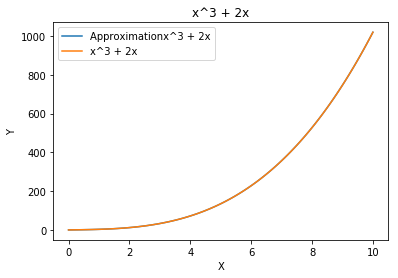

(4, 'Relative error:  ', 0.0163673844935262)


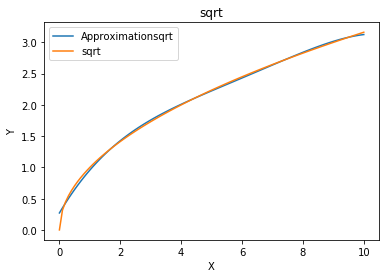

(4, 'Relative error:  ', 0.626754214163555)


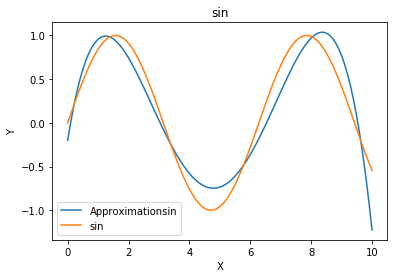

(4, 'Relative error:  ', 6.46963066334108e-14)


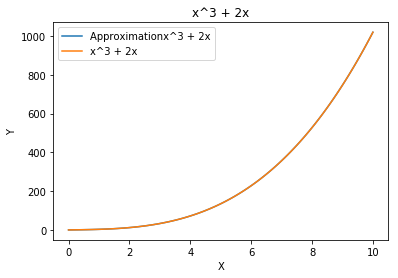

(5, 'Relative error:  ', 0.0120123731805259)


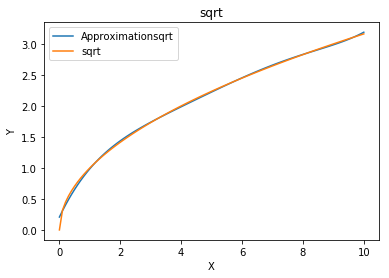

(5, 'Relative error:  ', 0.695172638673007)


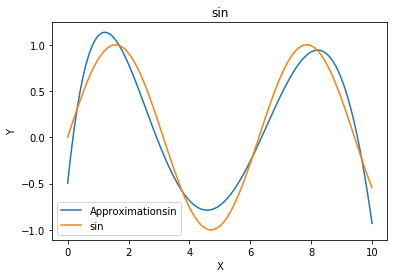

(5, 'Relative error:  ', 2.43923873442380e-11)


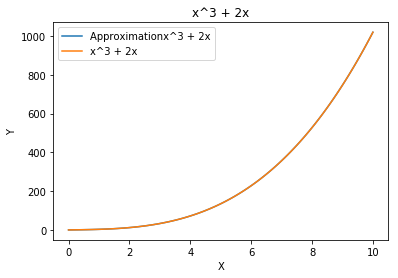

(6, 'Relative error:  ', 0.00893490825179187)


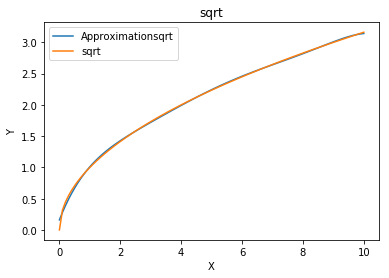

(6, 'Relative error:  ', 0.138619088381044)


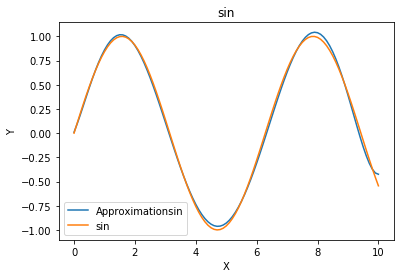

(6, 'Relative error:  ', 1.27206372579282e-11)


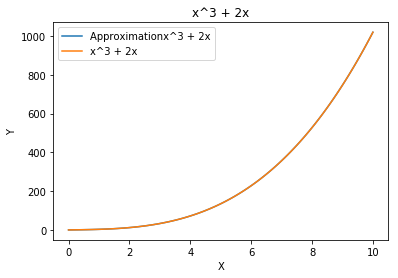

(7, 'Relative error:  ', 0.00866643368732932)


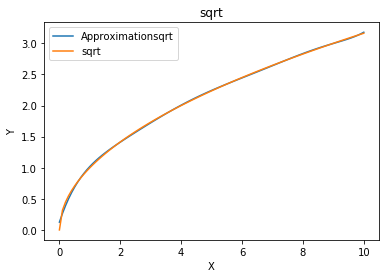

(7, 'Relative error:  ', 0.116173490268305)


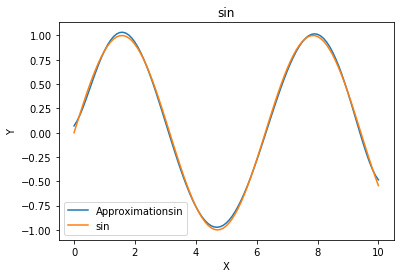

(7, 'Relative error:  ', 3.97360235348713e-10)


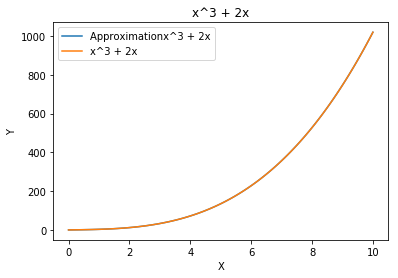

(8, 'Relative error:  ', 0.00825498650752624)


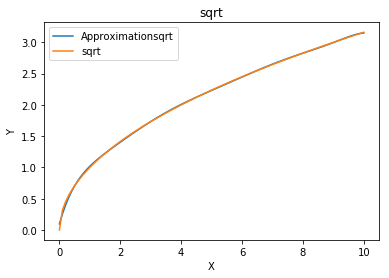

(8, 'Relative error:  ', 0.0122221547194756)


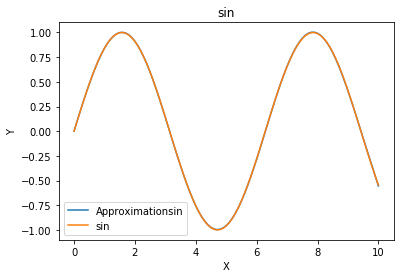

(8, 'Relative error:  ', 2.85039734136379e-9)


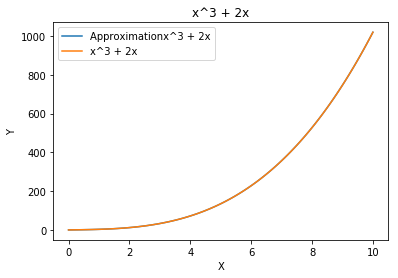

In [147]:
approximation(0, 10, 100, 8)

Cases of COVID-19 in Belarus
('degree', 1)


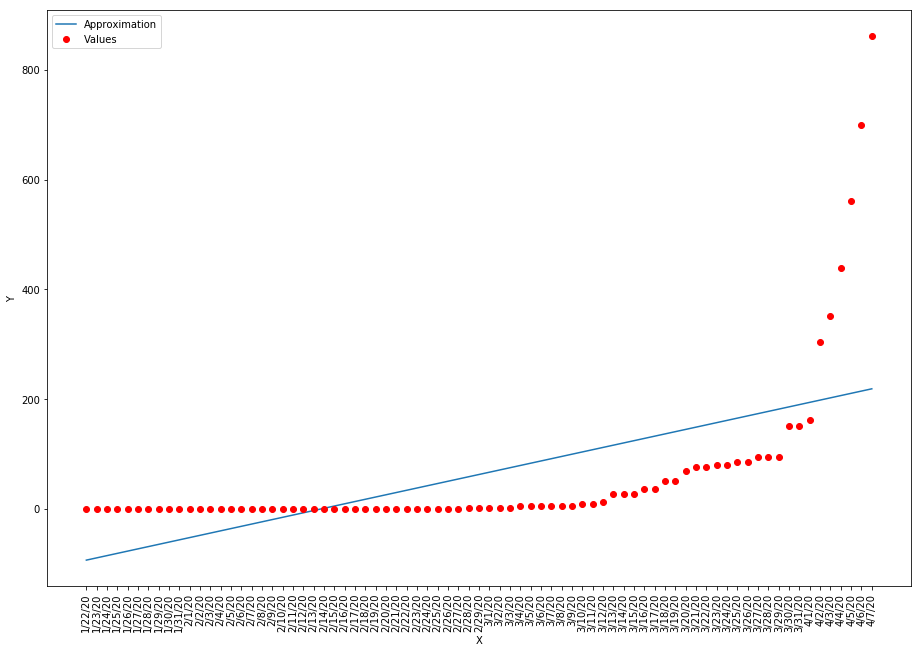

('degree', 2)


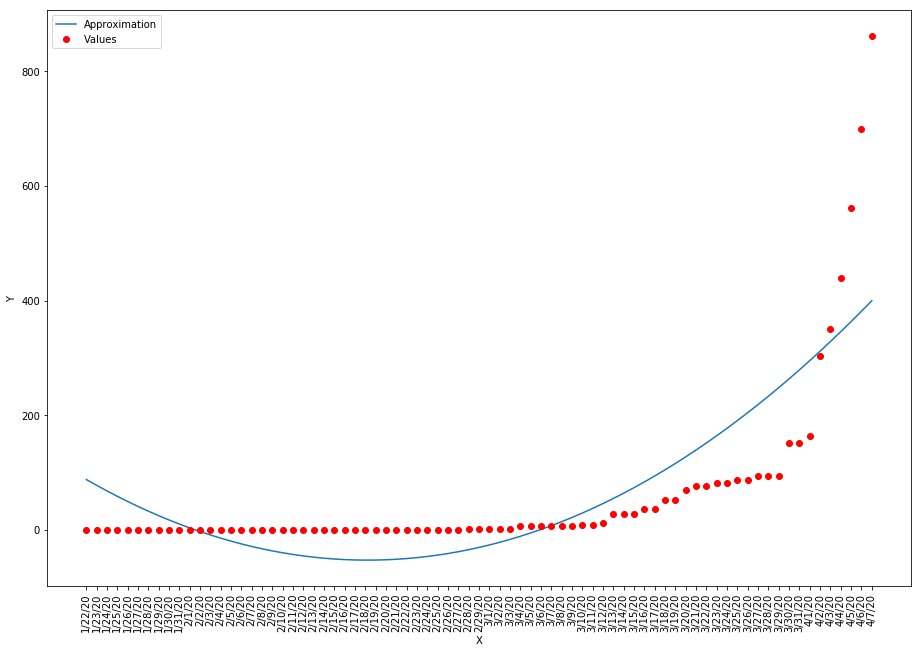

('degree', 3)


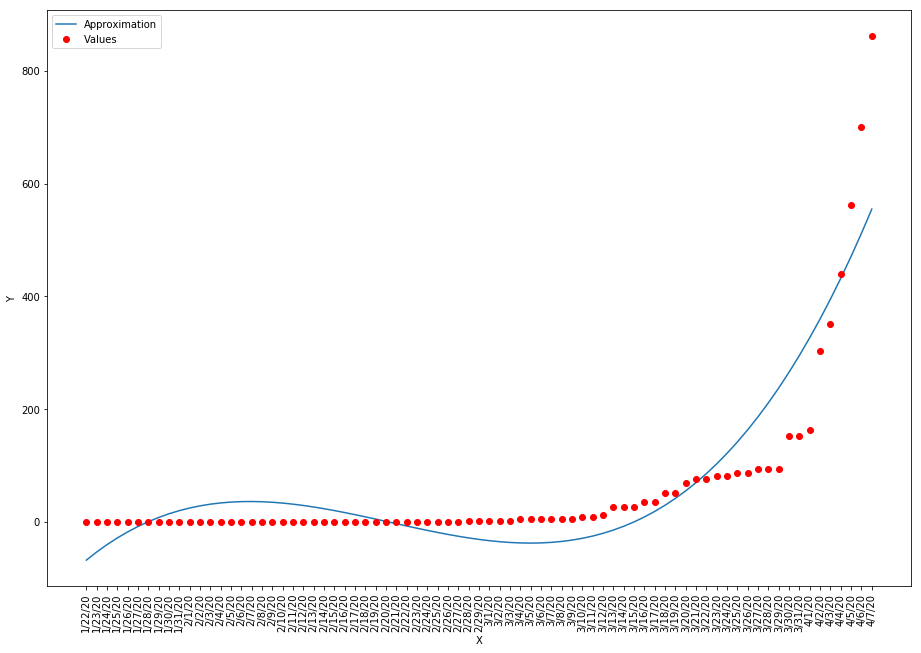

('degree', 4)


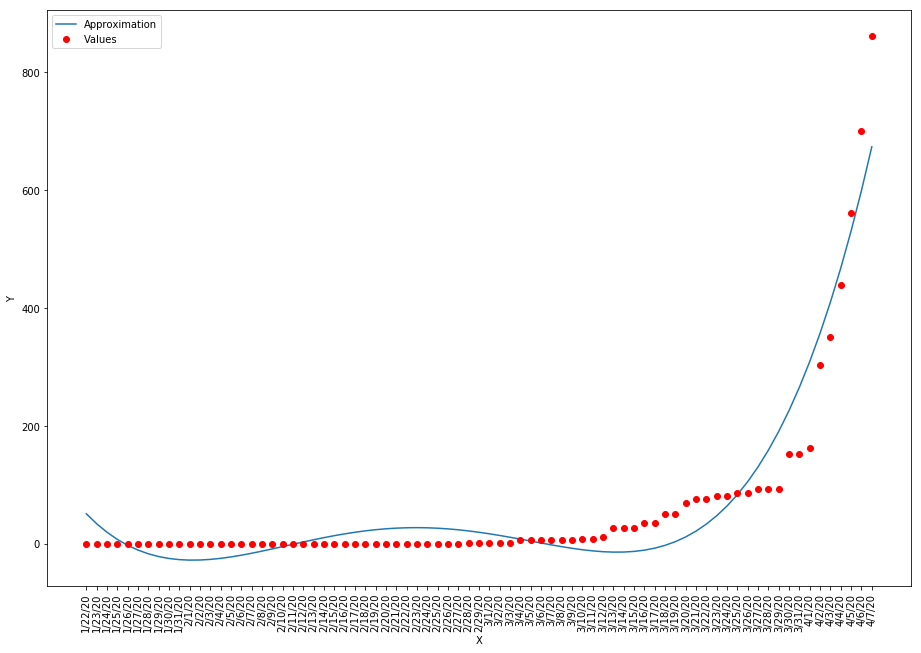

('degree', 5)


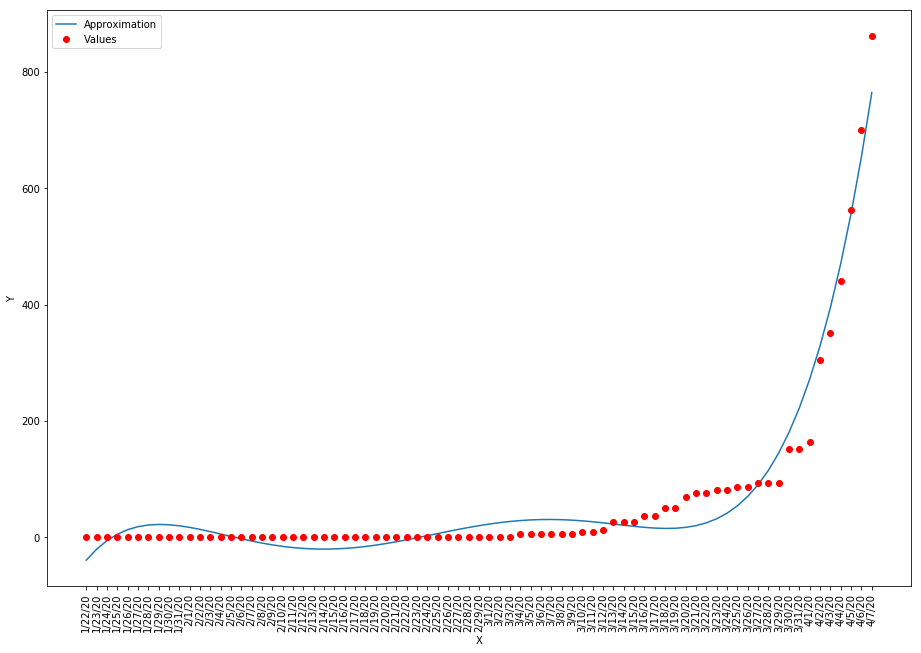

('degree', 6)


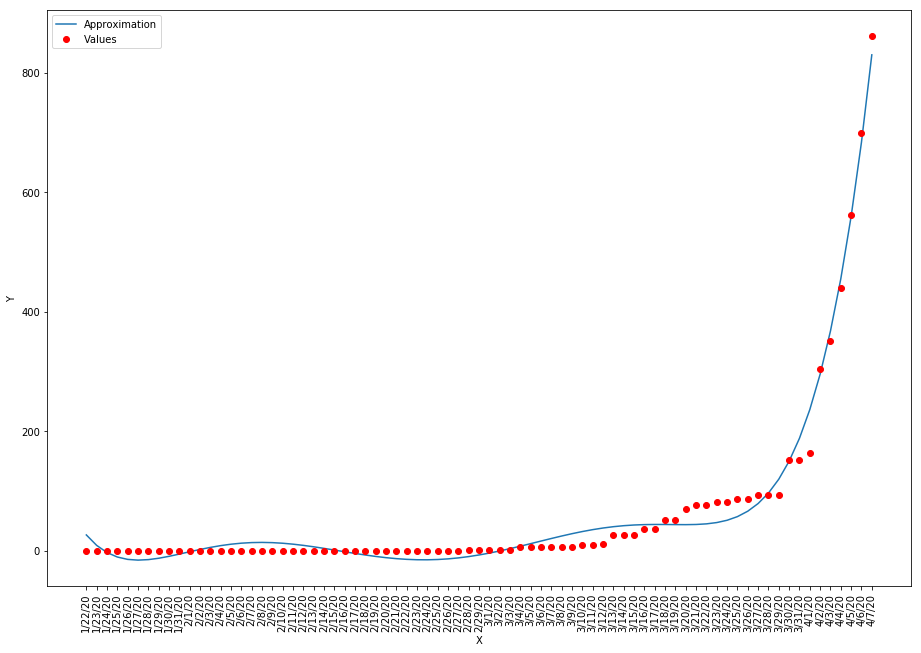

('degree', 7)


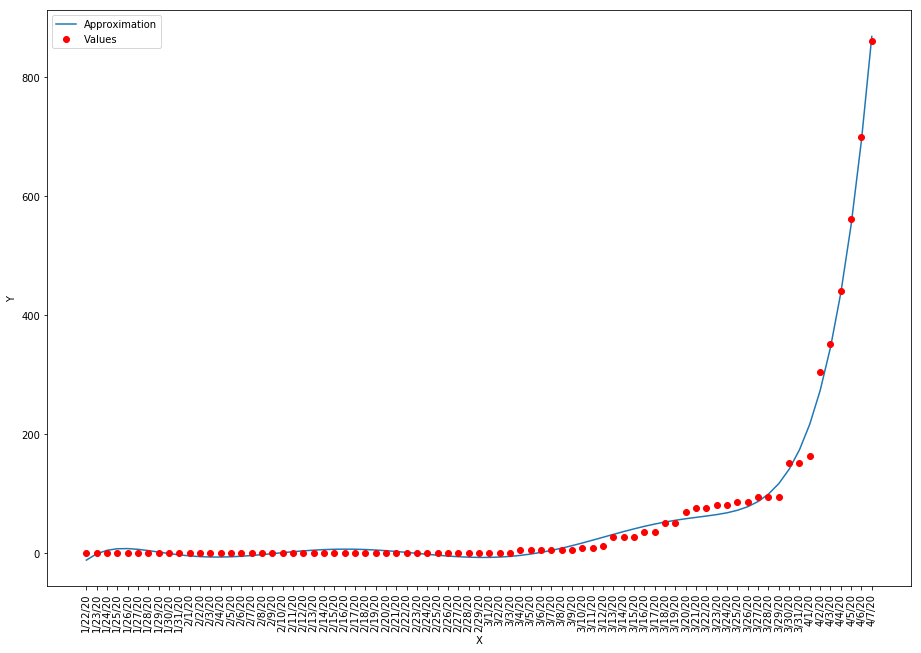

('degree', 8)


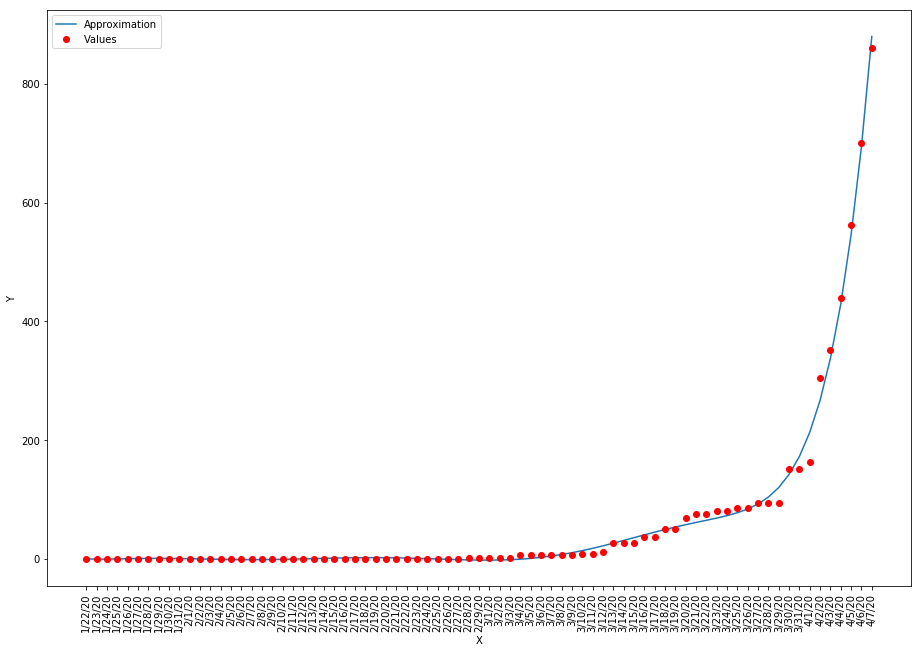

In [151]:
def show_graphic2(x, y, real_x, real_y):
    fig= plot.figure()
    axes= fig.add_axes([0,0,2,2])
    plot.xlabel("X")
    plot.ylabel("Y")
    plot.plot(x, y, label="Approximation")
    plot.plot(real_x, real_y, 'or', label="Values")
    plot.xticks(rotation=90)
    plot.legend()
    plot.show()

def covid(m):
    print("Cases of COVID-19 in Belarus")
    for i in range(1, m+1):
        print("degree", i)
        poly = aproximate(np.linspace(1, len(cases), len(cases)), cases, i)
        y = []
        for i in range(1, len(cases)+1):
          y.append(get_value(poly, i))
        show_graphic2(dates, y, dates, cases)
    
covid(8)

##### Zadanie 1a (dla chętnych)
Proszę zwrócić uwagę na dane wygenerowane przez funkcję trygonometryczną i wynik ich aproksymacji. Proszę spróbować zastosować aproksymację środniokwadratową funkcjami trygonometrycznymi. 

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 

In [152]:
def approximate2(min, max, n, m):
    for i in range(1, m+1):
        print("degree ", i)
        fun = lambda x: pow(x, 3) + 2 * x
        sqrt_x, sqrt_y = into_table(np.math.sqrt, min, max, n)
        sin_x, sin_y = into_table(np.math.sin, min, max, n)
        f_x, f_y = into_table(fun, min, max, n)

        poly_sqrt = np.polyfit(sqrt_x, sqrt_y, deg=i, full=True)
        poly_sin = np.polyfit(sin_x, sin_y, deg=i, full=True)
        poly_f = np.polyfit(f_x, f_y, deg=i, full=True)
        
        y_sqrt_approx = np.polyval(poly_sqrt[0], sqrt_x)
        y_sin_approx = np.polyval(poly_sin[0], sqrt_x)
        y_f_approx = np.polyval(poly_f[0], f_x)

        print("Sqrt")
        show_graphic2(sqrt_x, y_sqrt_approx, sqrt_x, sqrt_y)
        print("Sin")
        show_graphic2(sin_x, y_sin_approx, sin_x, sin_y)
        print("x^3 + 2x")
        show_graphic2(f_x, y_f_approx, f_x, f_y)


def covid2(m):
    print("Cases of COVID-19 in Belarus")
    for i in range(1, m+1):
        print("degree", i)
        poly = np.polyfit(np.linspace(1, len(cases), len(cases)), cases, i)
        y = np.polyval(poly, np.linspace(1, len(cases), len(cases)))
        draw2(dates, y, dates, cases)

('degree ', 1)
Sqrt


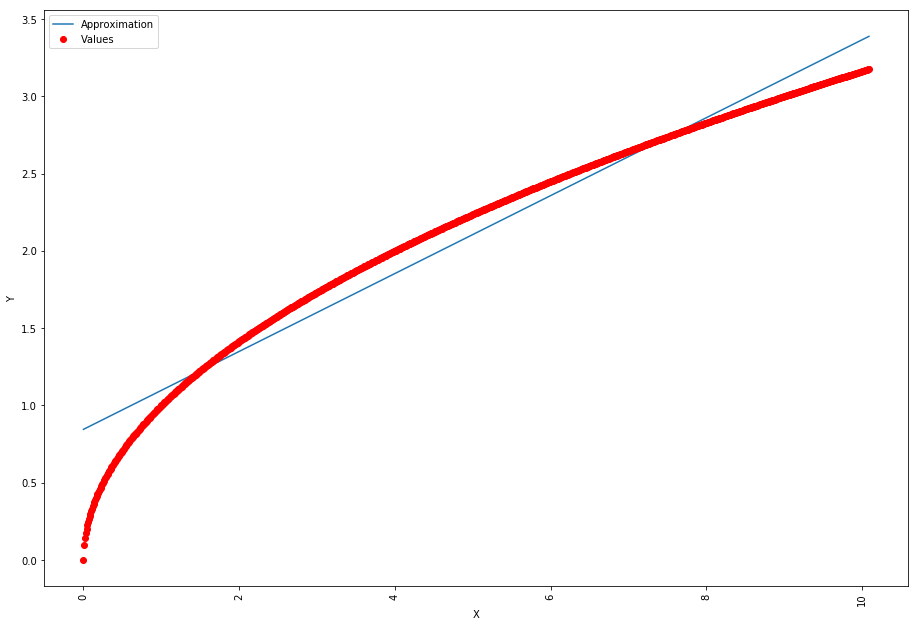

Sin


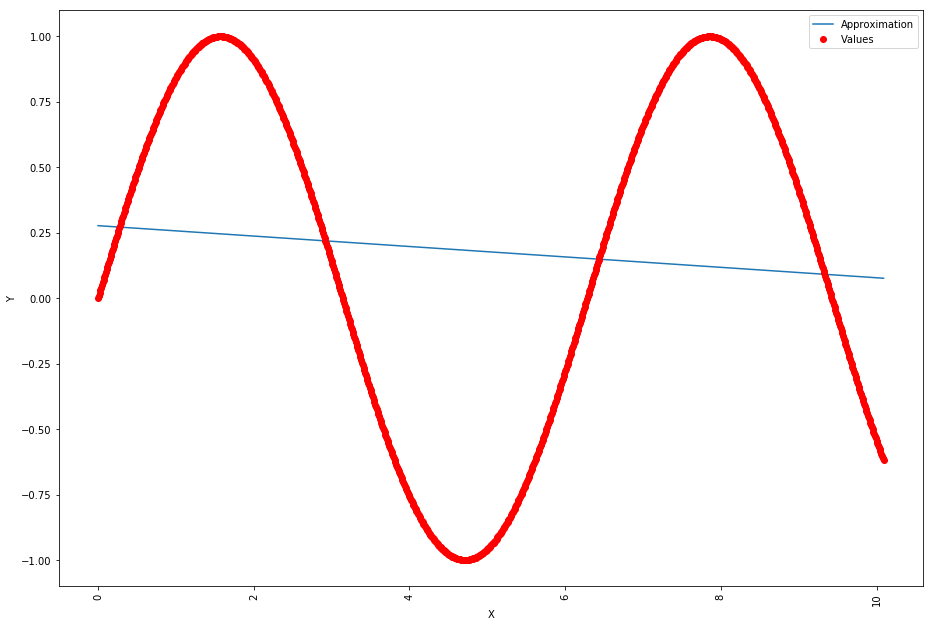

x^3 + 2x


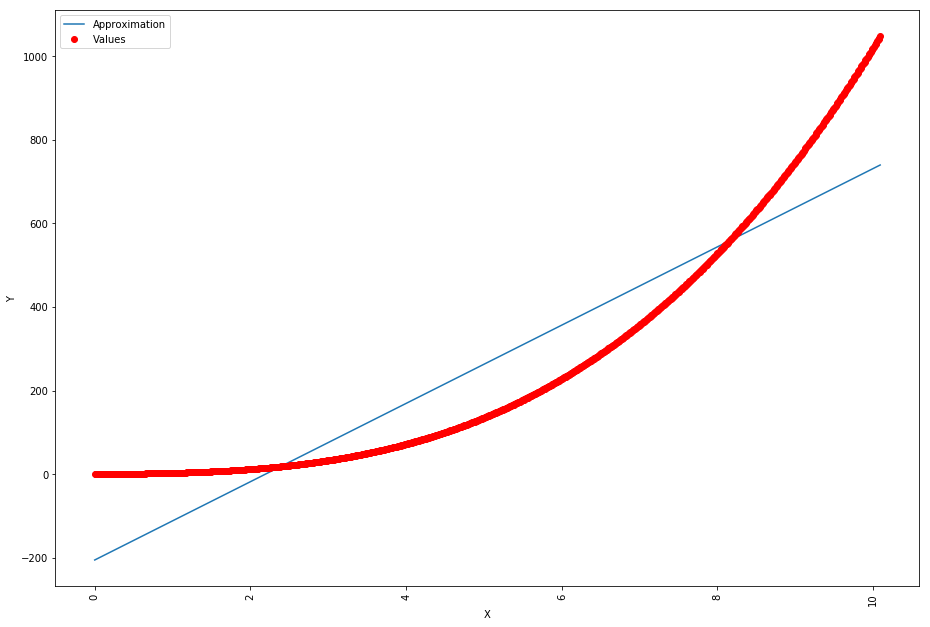

('degree ', 2)
Sqrt


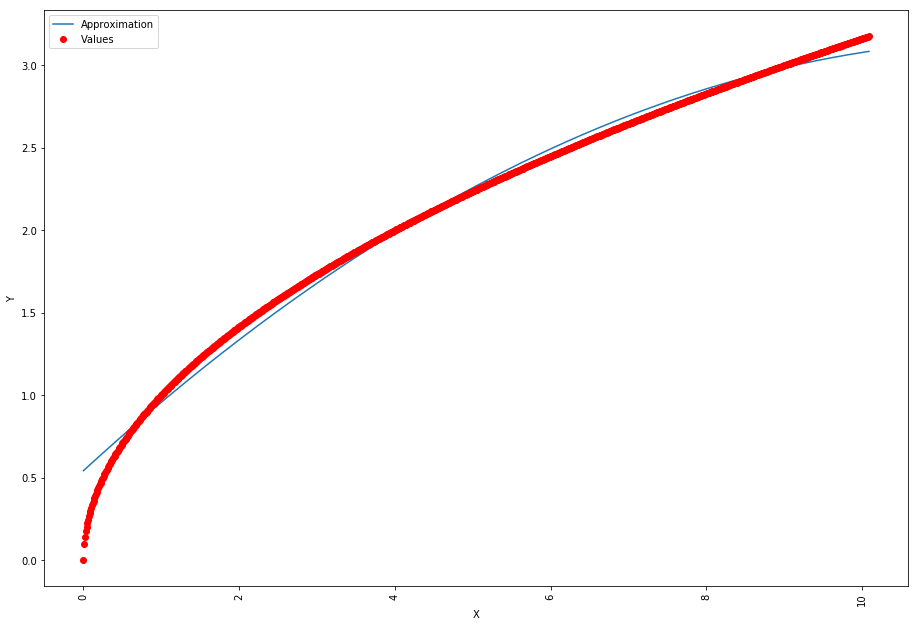

Sin


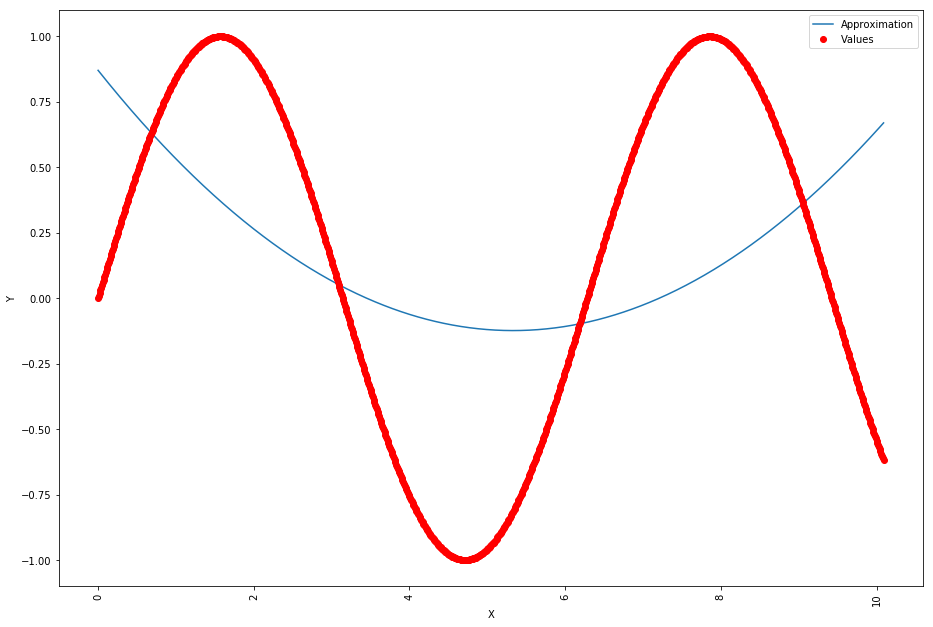

x^3 + 2x


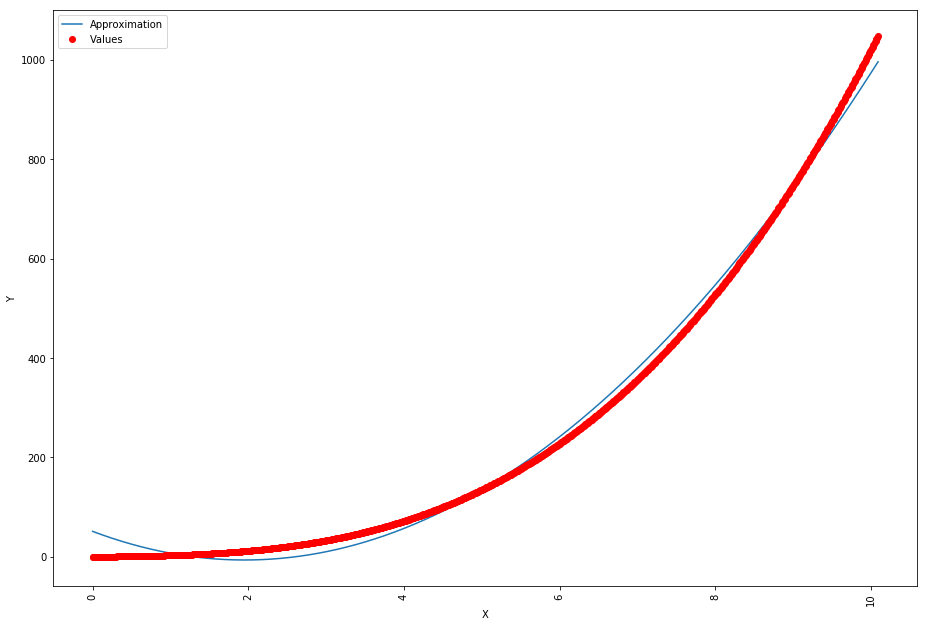

('degree ', 3)
Sqrt


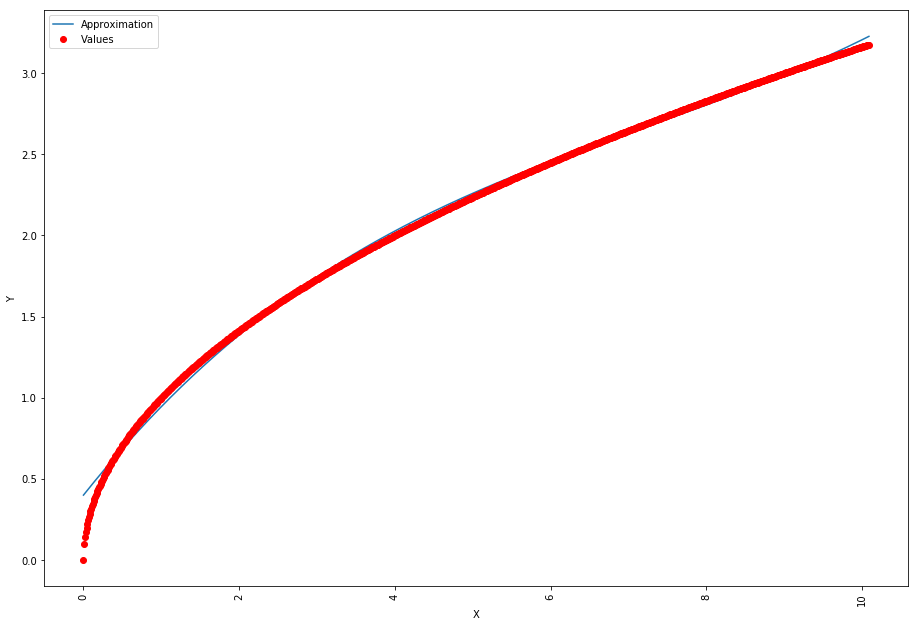

Sin


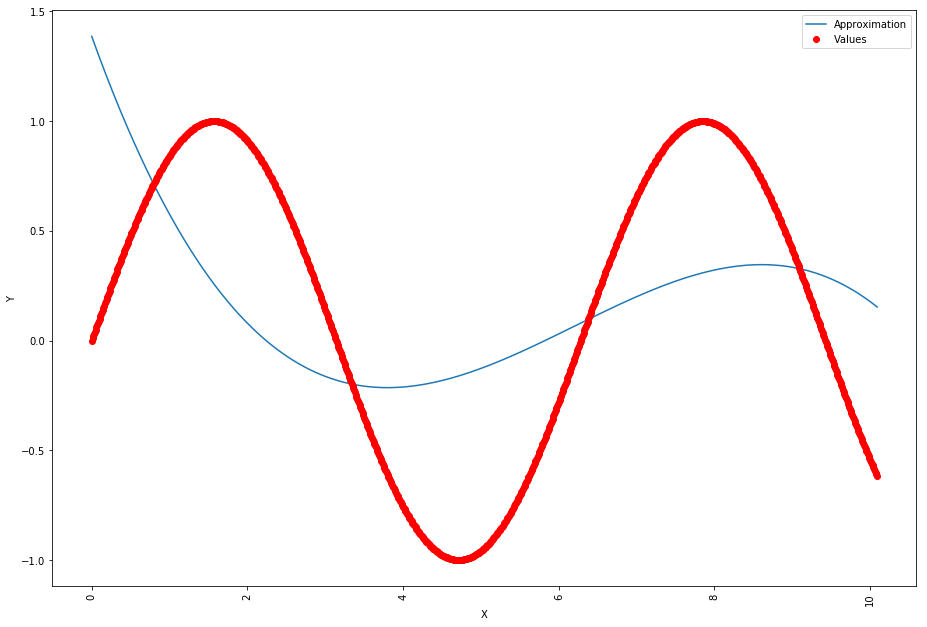

x^3 + 2x


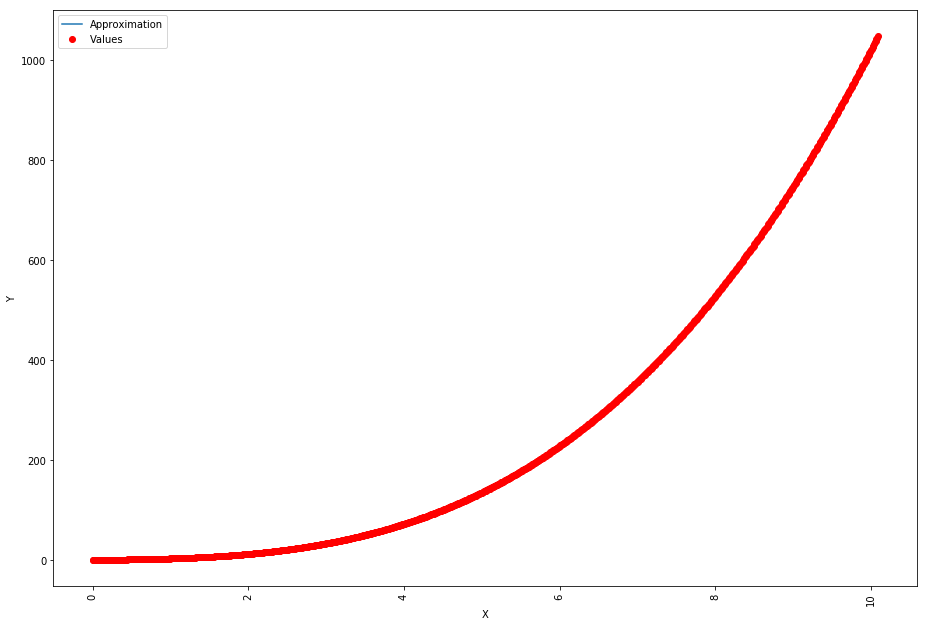

('degree ', 4)
Sqrt


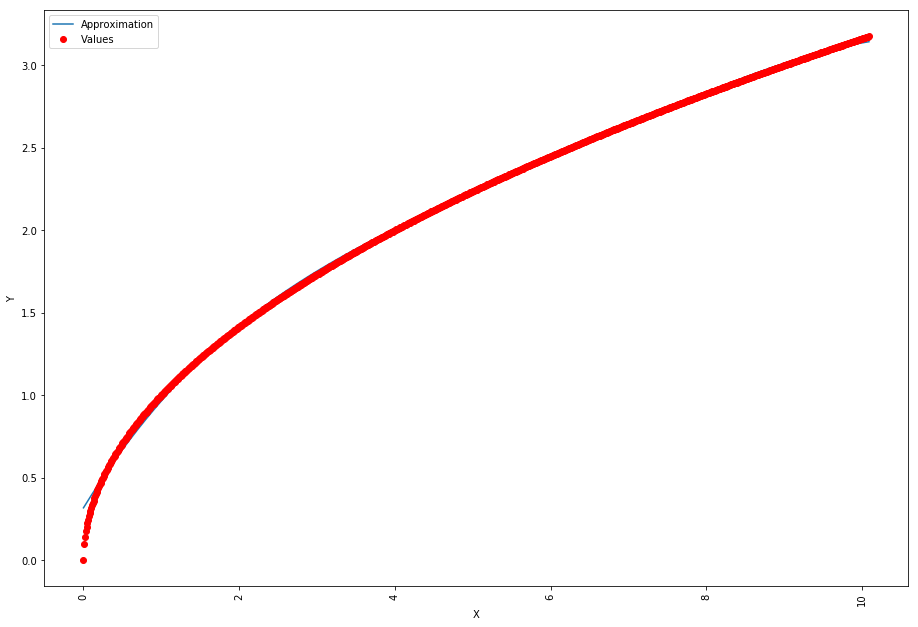

Sin


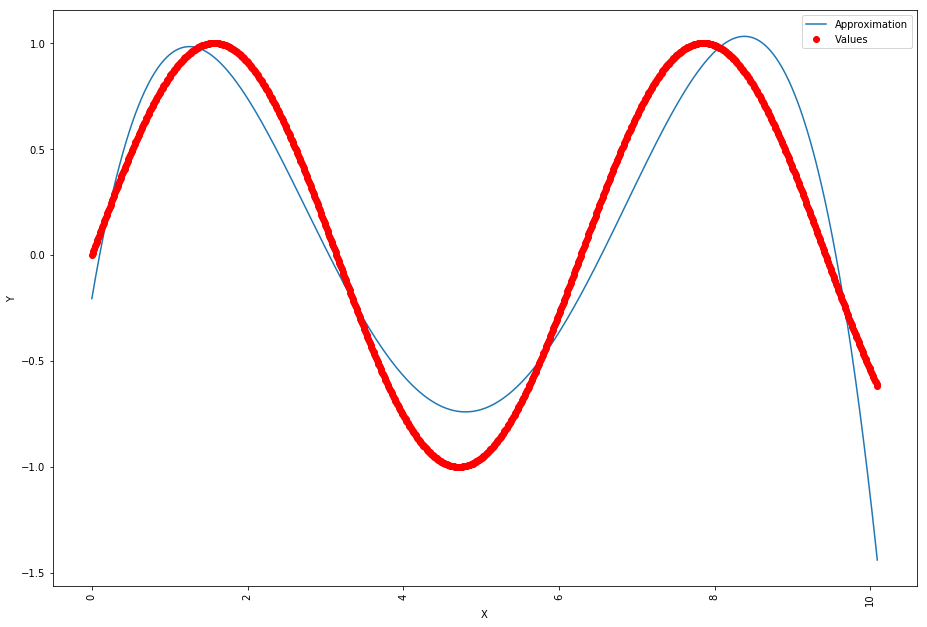

x^3 + 2x


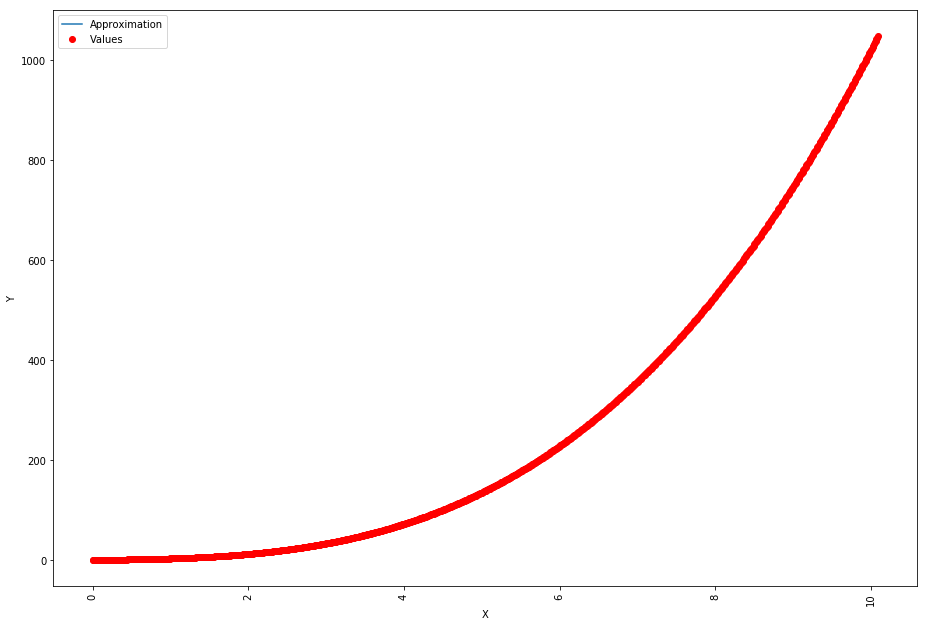

('degree ', 5)
Sqrt


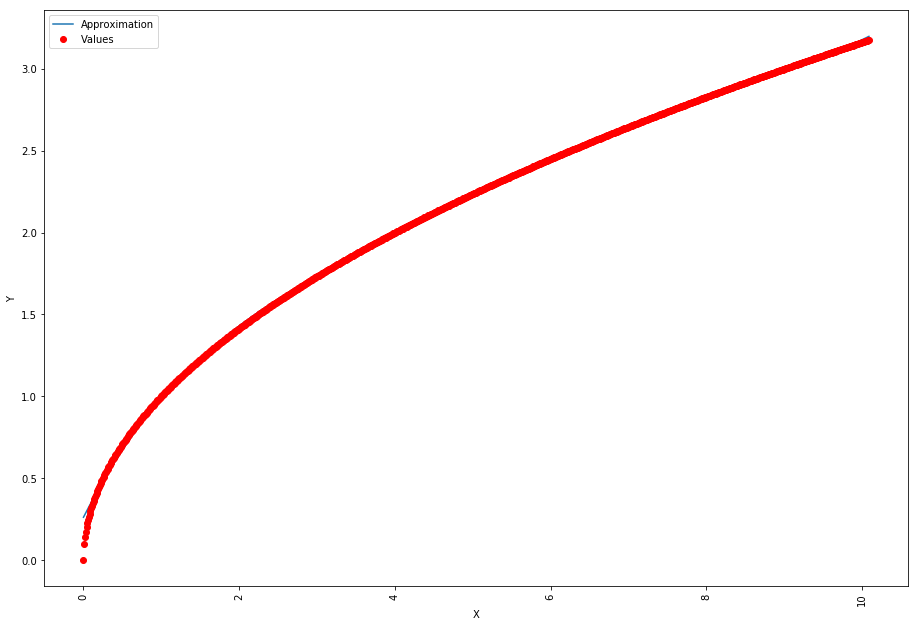

Sin


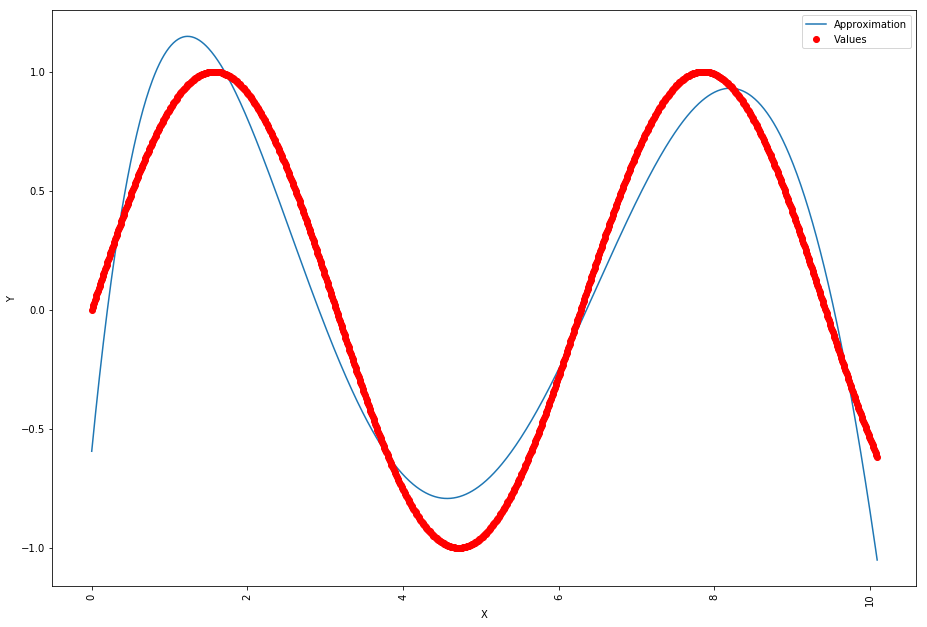

x^3 + 2x


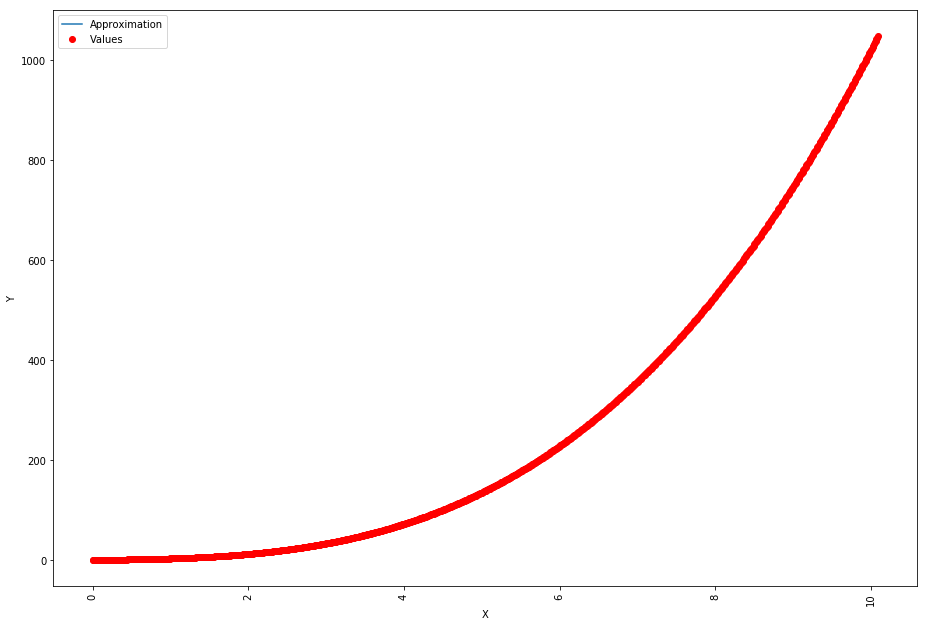

('degree ', 6)
Sqrt


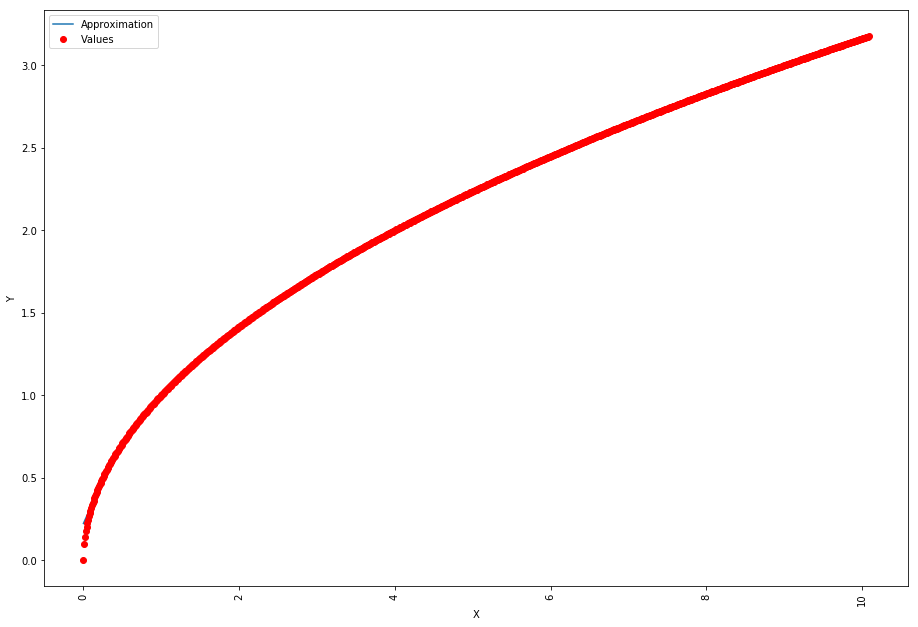

Sin


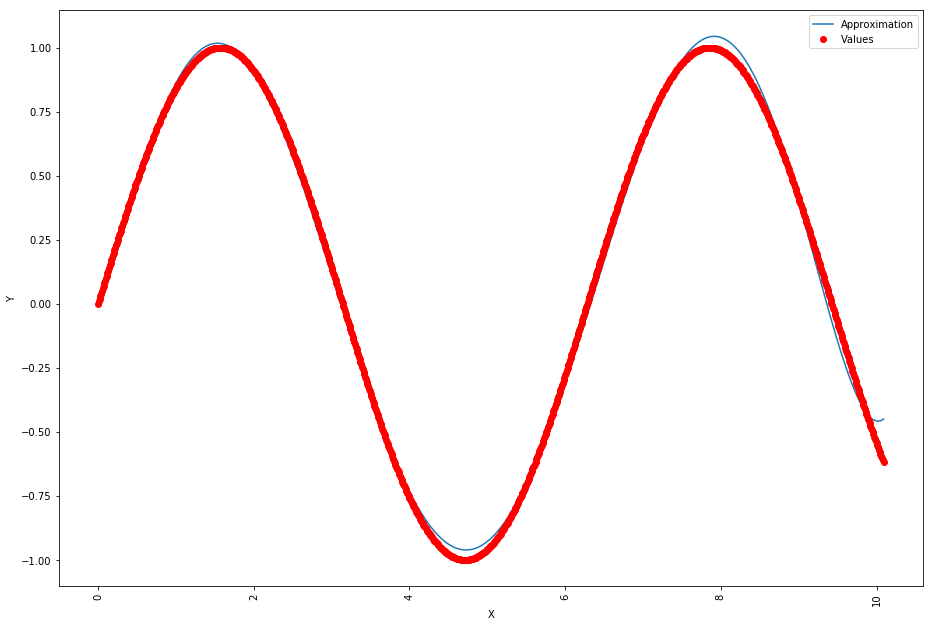

x^3 + 2x


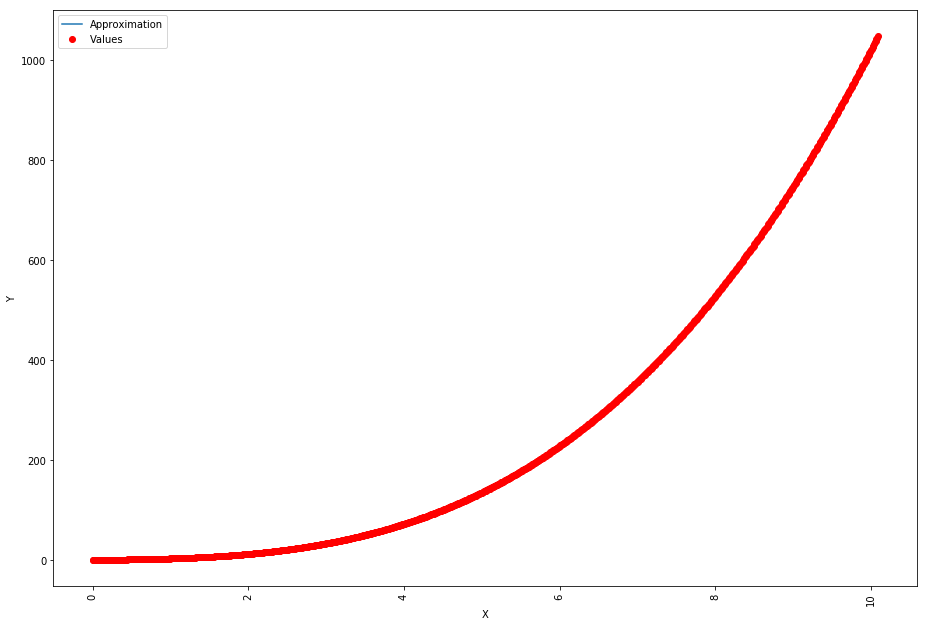

('degree ', 7)
Sqrt


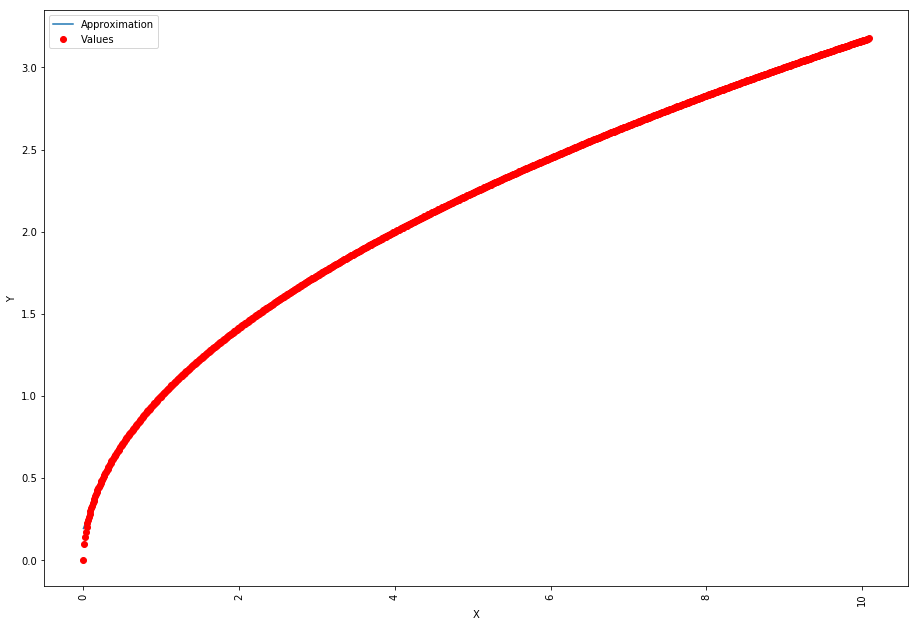

Sin


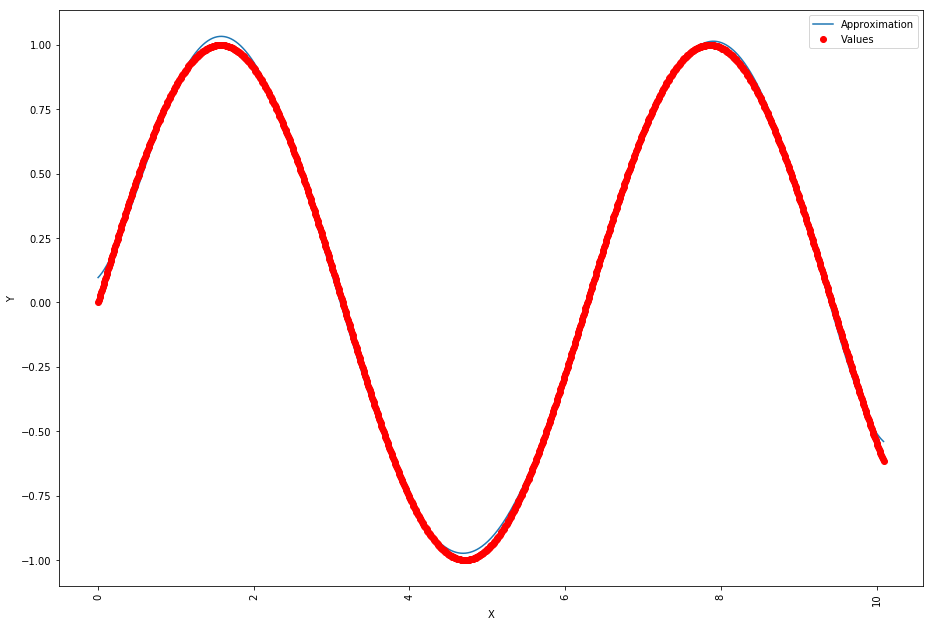

x^3 + 2x


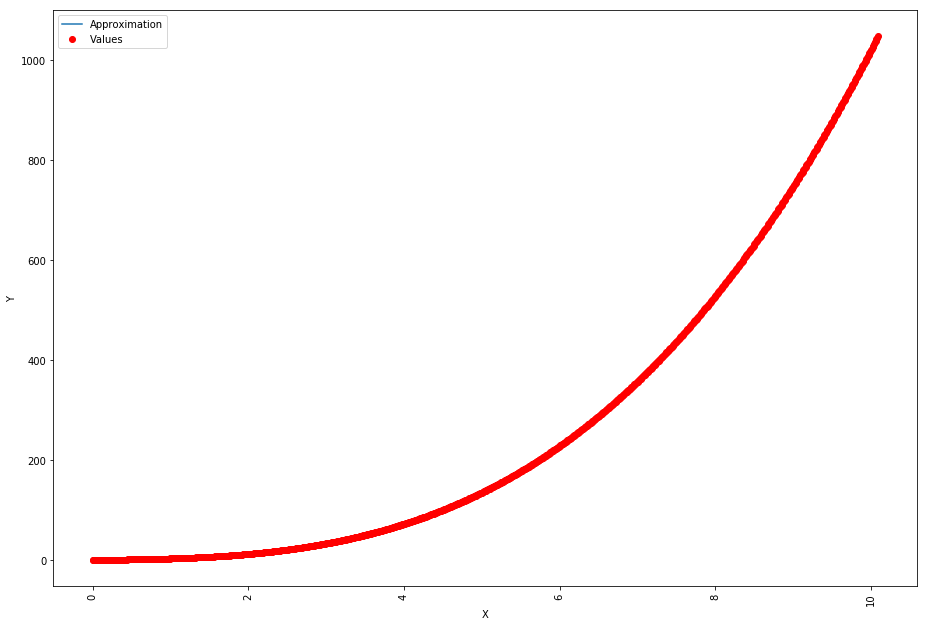

('degree ', 8)
Sqrt


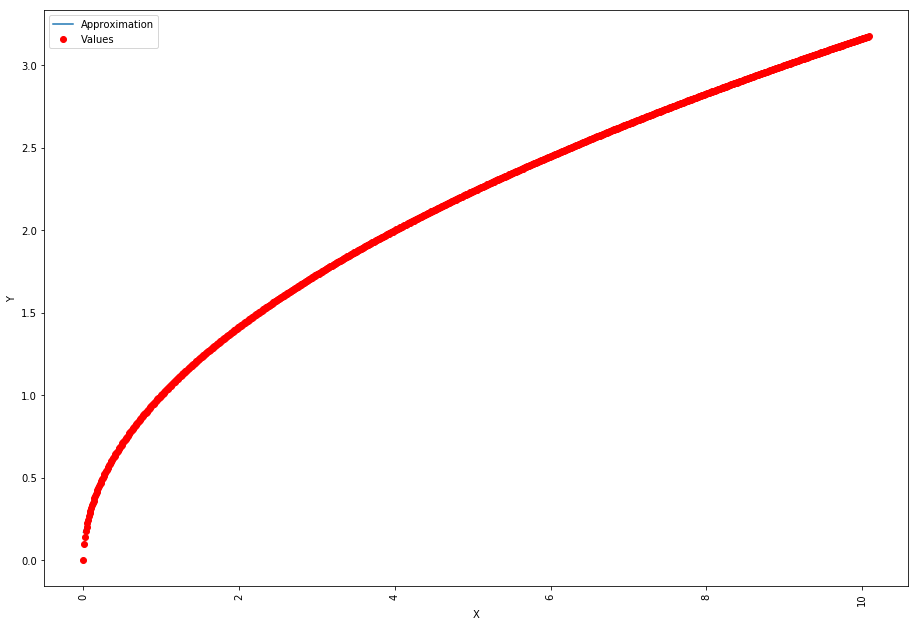

Sin


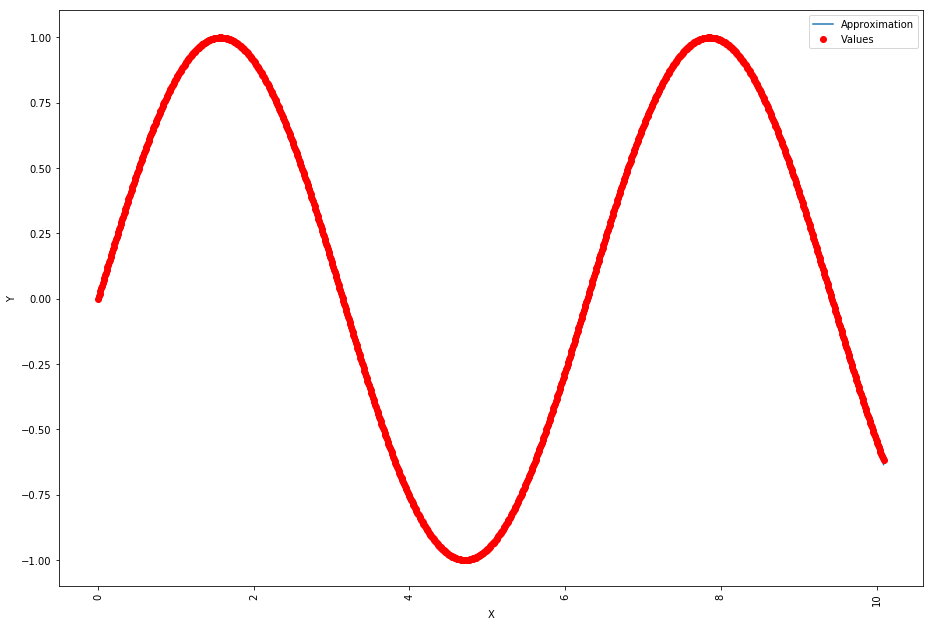

x^3 + 2x


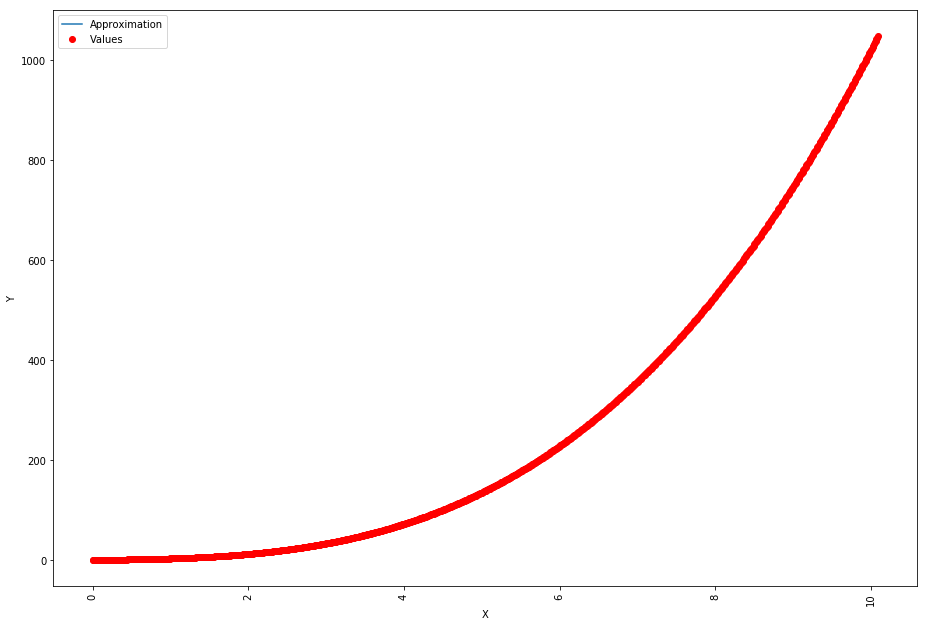

In [153]:
approximate2(0, 10, 1000, 8)

Cases of COVID-19 in Belarus
('degree', 1)


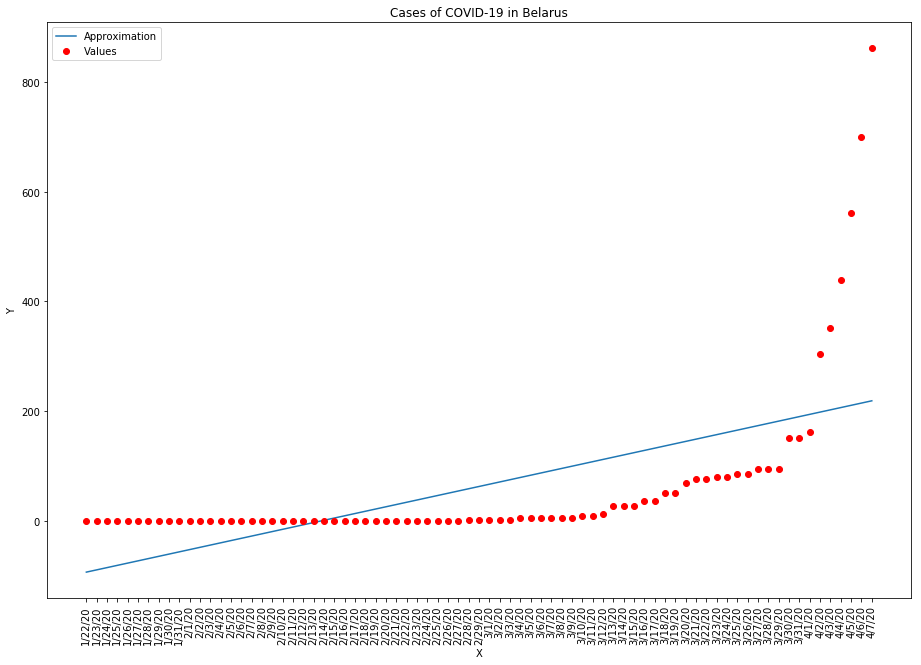

('degree', 2)


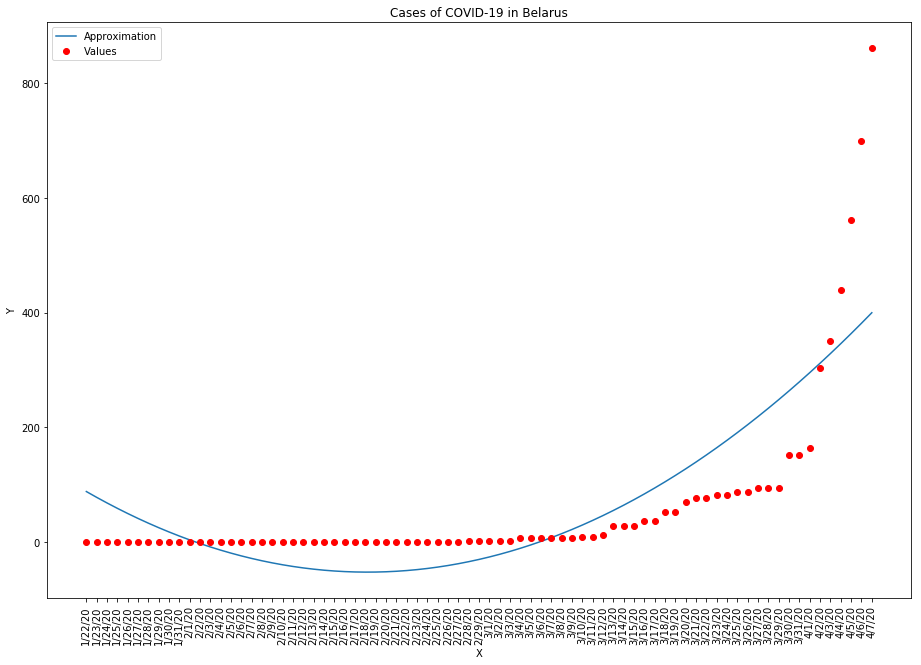

('degree', 3)


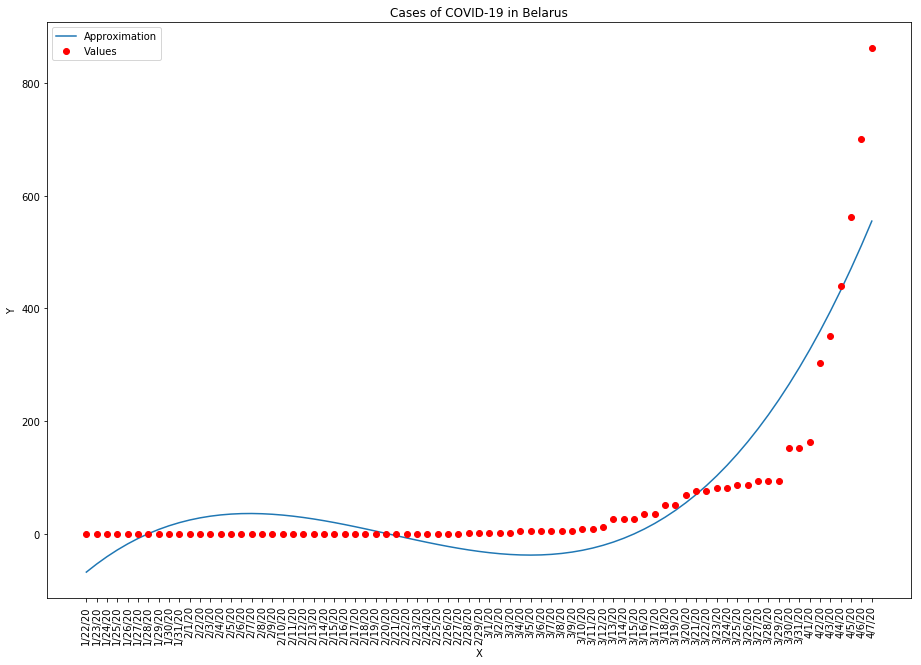

('degree', 4)


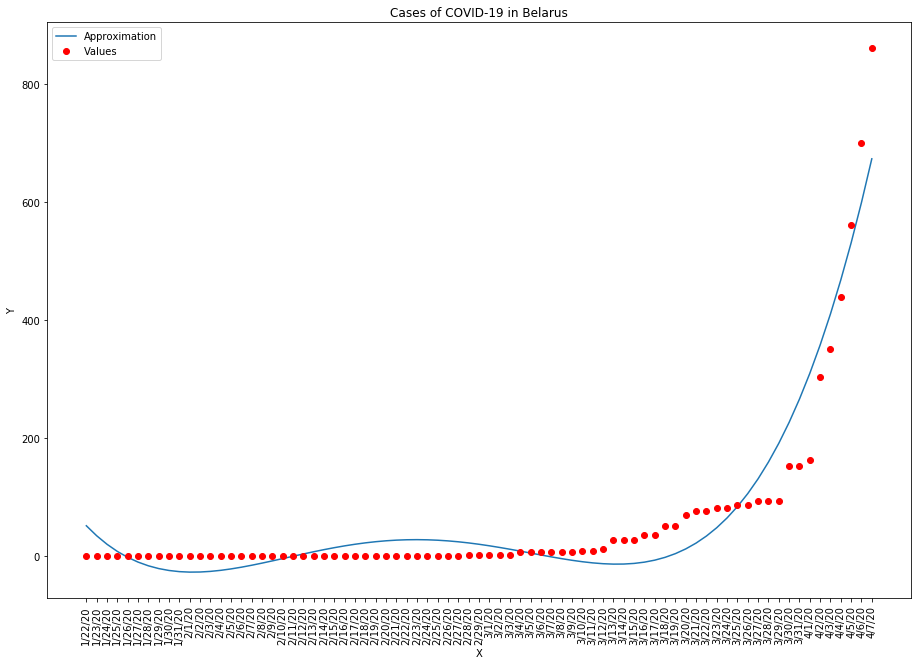

('degree', 5)


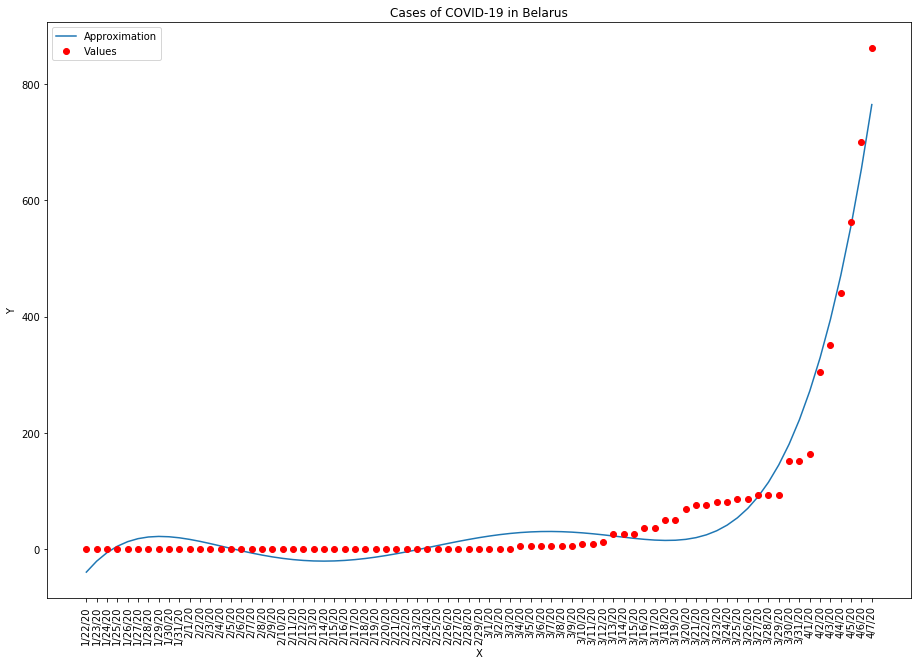

('degree', 6)


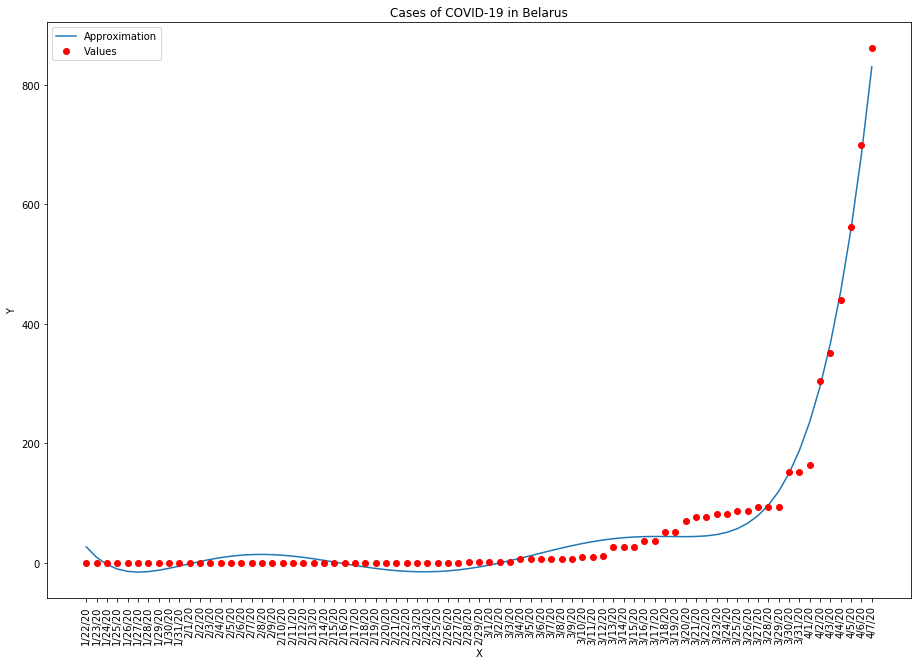

('degree', 7)


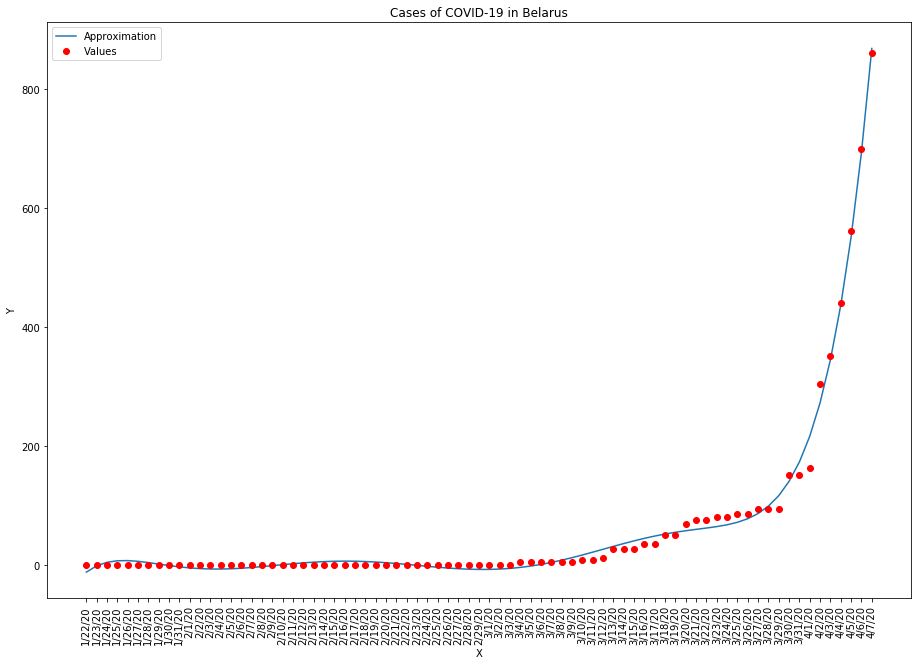

('degree', 8)


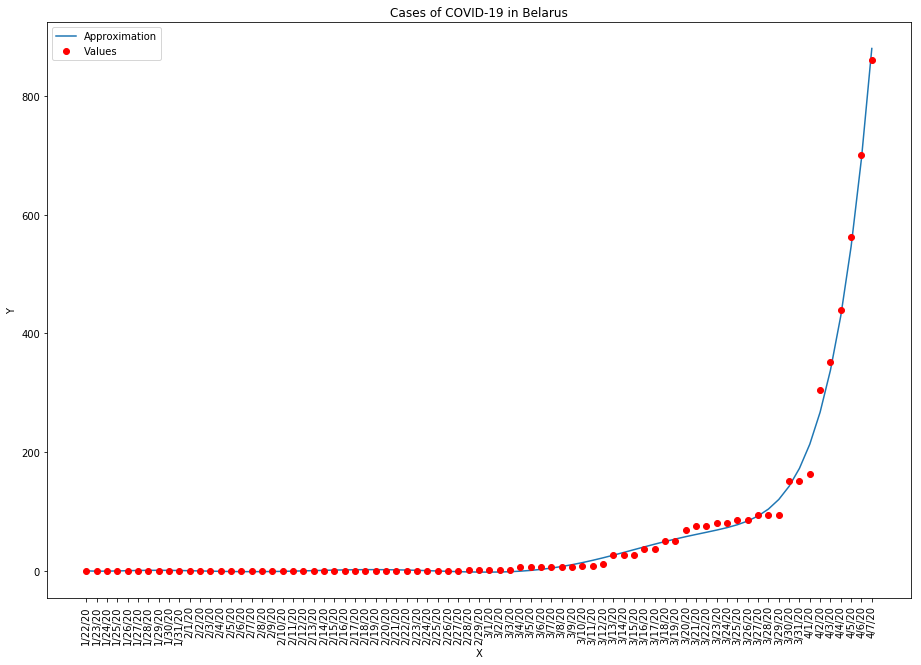

In [154]:
covid2(8)